# Class Work - Fourier Transforms
This notebook will be a brief introduction to Fourier Transforms (FT) and their uses in astronomy. The Fourier Transform is one of the most important tools in any sort of signal processing you might be carying out. Developed in the early 1800s to aid in the describe the flow of heat, the Fourier transform allows you to break down *any* signal as a series of sine waves. The key concept to recognize with a FT is that it transforms your data from the time-domain to the frequency-domain. That is to say that if your data represents a seriese of measurments through time (such as a light curve in astronomy) the FT of that data will represent the contributing power of frequencies for that signal. A peak in the FT at some frequency means that frequency strongly contributes to the overall shape of the signal.

We will break this project down into two sections, an analytical section and a practical section. The analytical section will introduce you to Fourier Transforms, how to solve them for some defined function, $f(t)$, and how to understand what they imply. The practical section will introduce you to tools you can use to decompose time series data into frequency space data as as astronomer. 

This notebook was written by Emily Boudreaux for A74 in F24.


# The Fourier Transform
Fourier transforms take some function, $f(t)$, and decompose it to frequency components. Fourier originally found two forms of the Fourier Transform. The cosine transform

$$
F(\omega) = \frac{2}{\pi}\int_{0}^{\infty}f(t)\cos(\omega t)dt 
$$
$$
f(t) = \int_{0}^{\infty}F(\omega)\cos(\omega t)d\nu
$$

and the sine transformation.

$$
F(\omega) = \frac{2}{\pi}\int_{0}^{\infty}f(t)\sin(\omega t)dt 
$$
$$
f(t) = \int_{0}^{\infty}F(\omega)\sin(\omega t)d\nu
$$

Much more commonly today we will use Euler's Forumula to build a slightly more general definition which, incidently, is also often simpler to integrate.

First Recall Euler's Formula
$$
e^{i\theta} = \cos(\theta) + i\sin(\theta)
$$
We can then use this to pull out the strength of a function at some frequency...

$$
F(\omega) = \int_{-\infty}^{\infty}f(t)e^{-i\omega t}dt
$$
$$
f(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty}F(\omega)e^{i\omega t}d\omega
$$

Lets think about what this is doing. Note how the form of the fourier transform is a projection (or inner product) of $f(t)$ onto $e^{i\omega t}$. In the FT $e^{-i \omega t}$ acts as a probe as to the strength of $f(t)$ at frequency $\omega$. That is to say that $|F(\omega)|$ is the magnitude of $f(t)$ at $\omega$.

One might expect that simple example of this would be to take the fourier transform of a sine wave

$$
\begin{align}
f(t) &= \sin(\omega_{0} t) \\
F(\omega) &= \int_{-\infty}^{\infty}\sin(\omega_{0} t)e^{-i\omega t}dt
\end{align}
$$

However, if you were to try to work through this in the most straightforward manner you will find that this integral does not converge. This should make sense as $\sin(\omega t)$ oscillates forever and therefore there is infinite area under this curve. However, we can also intuitivley understand that the frequency space transformation of a sine wave should have the form of a dirac delta function, $\delta(\omega)$. In order to find this we need to decompose the $f(t)$ using Euler's formula

$$
\begin{align}
    \sin(\omega_{0} t) &= \frac{e^{i\omega_{0}t} - e^{-i\omega_{0}t}}{2i} \\
    F(\omega) &= \int_{-\infty}^{\infty}\frac{e^{i\omega_{0}t} - e^{-i\omega_{0}t}}{2i}e^{-i\omega t}dt \\
    F(\omega) &= \frac{1}{2i}\left(\int_{-\infty}^{\infty}e^{i(\omega_{0}-\omega)t}dt - \int_{-\infty}^{\infty}e^{-i(\omega_{0}+\omega)t}dt\right)
\end{align}
$$

Now recall the dirac delta function (distribution), $\delta(\alpha)$,
$$
\delta(\alpha) = \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{it\alpha}dt \hspace{1cm} \delta(\alpha) = \begin{cases}
\infty & \alpha = 0 \\
0 & \alpha \neq 0
\end{cases}
$$
Note how this is similar to the form we have in our fourier integrand with $\alpha=\omega_{0} - \omega$ and $\alpha=-\omega_{0}-\omega$. Therefore
$$
\begin{align}
F(\omega) &= \frac{1}{2i}\left(2\pi\delta(\omega_{0}-\omega) - 2\pi\delta(-\omega_{0}-\omega)\right)\\
F(\omega) &= \frac{\pi}{i}\left(\delta(\omega_{0}-\omega) - \delta(-\omega_{0}-\omega)\right)
\end{align}
$$
The dirac delta function is only non zero when $\alpha=0$, therefore when
$$
\begin{align}
\omega_{0} - \omega &= 0 \\
\omega_{0} &= \omega
\end{align}
$$
and
$$
\begin{align}
-\omega_{0} - \omega &= 0 \\
-\omega_{0} &= \omega
\end{align}
$$
So we can see that the only frequencies where this function does not evlauate to 0 are $\omega=\pm\omega_{0}$. This is the original frequency we may have expected and that same frequency reflected about $\omega=0$. Note how this would not have been solvable without invoking the dirac delta function. The fourier transform (without the dirac delta function) is therefore only usable on functions, $f(t)$, where
$$
\lim_{t\rightarrow\infty}f(t) = 0
$$
and
$$
\lim_{t\rightarrow-\infty}f(t) = 0
$$
However, by incorperating $\delta$ we are able to evlatute the fourier transform for a much wider set of functions.

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

@np.vectorize
def diracDelta(alpha):
    if alpha==0:
        return 1
    else:
        return 0

## Q1. Computing FT's anaytically (4 pts)
Find the fourier transform (either by hand or using CAS systems such as mathematica or sympy. However, you may not simply ask a CAS to find the fourier transform of the function [i.e. you may use it for algebra and calculus]) of the following function. Make a plot of both $f(t)$ and $F(\omega)$. Does the frequency space representation make sense given the form of $f(t)$? What frequencies do you find compose $f(t)$?

$$
f(t) = \sin(2\pi t) + \cos\left(\frac{4\pi\omega_{0}}{3}t\right)
$$

The frequencies here that matter are $\pm \frac{4 \pi}{3}\omega_0$ and $\pm2\pi$, since those are the frequencies found in the two waves that are superimposed above. 

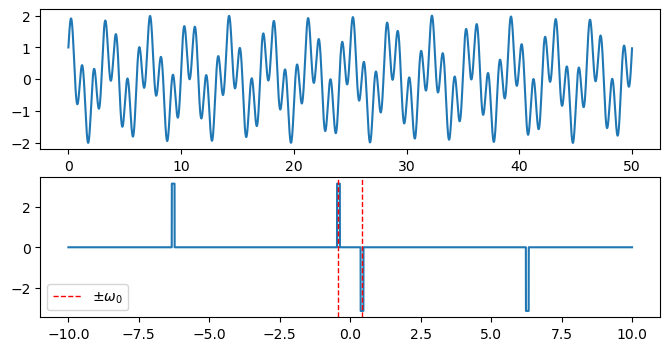

In [268]:
#Code here...
tarr = np.linspace(0,50,10000)
freqarr = np.linspace(-10,10,10000)
omega = 4*np.pi / 3 * 0.1
ft = np.sin(2*np.pi*tarr) + np.cos(4*np.pi*omega*tarr/3)
Ft = np.pi/(1j) * ((diracDelta(np.round(omega - freqarr,1)) - diracDelta(np.round(-omega - freqarr,1))) + (diracDelta(np.round(2*np.pi - freqarr,1)) - diracDelta(np.round(-2*np.pi - freqarr,1))))
fig,axs = plt.subplots(nrows=2,ncols=1,figsize=(8,4))
axs[0].plot(tarr,ft)
axs[1].plot((freqarr),(np.imag(Ft)))
axs[1].axvline(x=omega,linestyle='--',c='r',linewidth=1,label="$\\pm \\omega_0$")
axs[1].axvline(x=-omega,linestyle='--',c='r',linewidth=1)
axs[1].legend(loc='lower left');


# Transforming time series data into frequency space
## Building a periodigram
Included in this class work there is a file called lc.dat. Read this file in with python. You can use any parsing scheme you want; however, I recomend pandas here. After you read in the data plot it so you can see what it looks like in the time domain.

In [88]:
import pandas as pd
df = pd.read_csv("lc.dat")


Now we need to bring in the libraries for computing the periodigram. Both scipy and astropy include periodigram methods. Here we will use the Lombscargle periodigram from astropy (mostly cause it is a bit more user friendly). The scipy routine can sometimes be more general so that is good to be familar with as well.

In [89]:
from astropy.timeseries import LombScargle

Take some time now to go to the <a href="https://docs.astropy.org/en/stable/timeseries/lombscargle.html">astropy documentation</a> (also <a href="https://docs.astropy.org/en/stable/api/astropy.timeseries.LombScargle.html#astropy.timeseries.LombScargle">more docs here</a>)and read about how LombScargle is used. **Being able to comfortably read the documentation of external libraries is an important skill to develop!** There is *a lot* of information in the astropy documentation pages, you do not need to absorb all of it. What I want you to focus on is the practicalities of how this object is used. Pay particular attention to what the arguments to the object are and what methods (functions) you can call on the object. When you are learning to use a new piece of code these are often the first and most important things you want familiarize yourself with.

It is **okay** if the documentation is hard to parse through and you have questions! That is totally normal. Like any skill it takes practice. Please come to me when/if you have questions.

Once you have spent some time looking through the documentation for the LombScargle periodiogram try to make a periodigram from the data you read in! What you should see is one peak.


Text(0, 0.5, 'power')

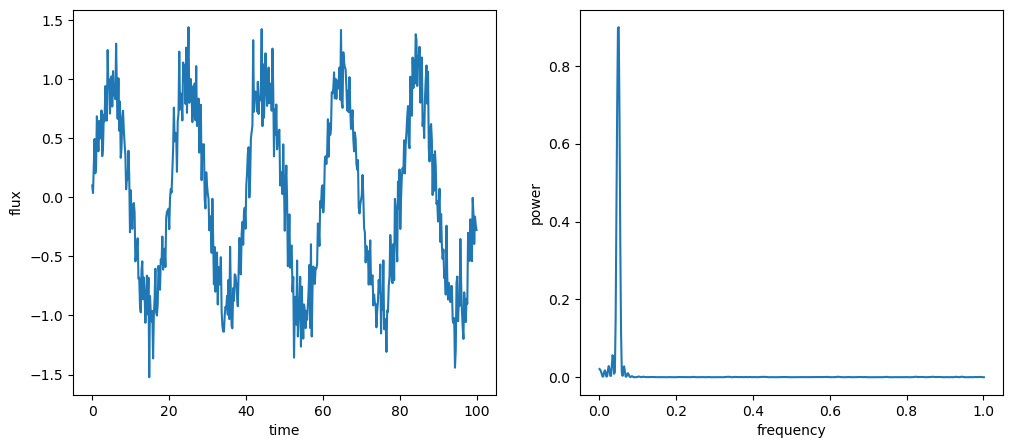

In [ ]:
# Code here...
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
axs[0].plot(df.time.values,df.flux.values)
axs[0].set_xlabel('time')
axs[0].set_ylabel('flux')
freq,power = LombScargle(df.time.values,df.flux.values).autopower(maximum_frequency=1) # there is more than one peak, but they are much higher frequency modes - limit max freq to recover just the main sine wave
axs[1].plot(freq,power)
axs[1].set_xlabel('frequency')
axs[1].set_ylabel('power')

In [118]:
mask = np.where(power == power.max())
print("Period of lowest frequency peak:",1/freq[mask])


Period of lowest frequency peak: [19.60784314]


## Q2. Interpreting FTs (1 pts)
What is the *period* of the variablility in this light curve? Does this agree with what you would expect from the time series data?

$P = 1/f_{max}$, where $f_{max}$ is the frequency corresponding to the maximum power. The period of the wave is just under 20 (units). This qualitatively matches the flux vs time plot. 

## Q3. Window Function (1 pt)
Recall when we calculated the fourier transform of a signal analytically we saw that at the frequencies needed to reporoduce the signal there were dirac delta functions and everywhere else the fourier transform of the function evaluated to 0. Note how that is not the case here. There is a primary peak in frequency space; however, it has some finite width to it and the function is never truley zero. Explain why this is. Note that there are two primary effects at play here. For this question feel free to google around, the search terms discrete fourier transforms and window funtions will get you some relevant results. Also consider the other parts of the synthetic data (aside from just the clear signal).

This is partially because we cannot measure any kind of signal, no matter how purely periodic, with infinite precision. There will always be some observational uncertainty, which means that the frequency has some errorbar/uncertainty/confidence interval, which then gives some width to the peak in the periodogram since the frequency is not simply a single value. Additionally, "spectral leakage" from using the window function changes the frequency spectrum, since using the window function (or any operation) will add spectral components.

## Q4. Limits of FTs (1 pt)
Are there any limits of using freqency space you can think of, just list anything you can think of! 

There could be really long or really short periods whcih aren't well captured by the time series data. Lomb-Scargle allows for unequally spaced time-series data, where high/low frequecy frequency oscellations could be missed entirely depending on the cadence of the observations. 

## Q5. Trends in Google Search Data (3 pts)

<a href="https://trends.google.com/trends/">Google Trends</a> allows a user to view some normalized version of search interest over time. Try to think of a topic which might have a periodic trend in its search interest (for example "Olympics"). Use the Google Trends form to pull up the information on your search then download it and generate a periodigram for it. Do you see a periodic trend in frequency space? Does it agree with what you expected? Do you see any additional trends in the data which you might not have expected? 

Next, use the trends view to pull up information on a search term which you think that would not exhibit periodic behavior. Use the tools you have learned to generate a periodigram for this data. Do you see any trends which you did not expect? What does the periodigram look like for non periodic behavior? 

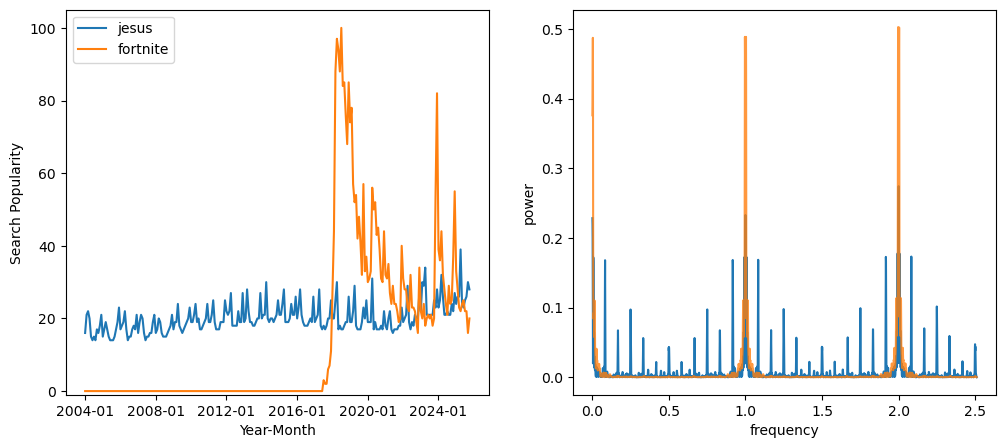

In [264]:
import warnings
warnings.filterwarnings('ignore')
iot = pd.read_csv("multiTimeline.csv")
iot = iot.replace('<1','0')
convert_dict = {'fortnite':int,'jesus':int}
iot = iot.astype(convert_dict)

# each index is months - 0 is jan 2004

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
axs[0].plot(iot.index,iot.jesus.values,label='jesus')
axs[0].plot(iot.index,iot.fortnite.values,label='fortnite')
axs[0].set_xticks(iot.index[::48])
axs[0].set_xticklabels(iot.Month.values[::48]);
axs[0].set_yticks(axs[0].get_yticks());
axs[0].set_xlabel('Year-Month')
axs[0].set_ylabel('Search Popularity')
axs[0].set_ylim(-1,105)
axs[0].legend(loc='upper left')
ffreq,fpower = LombScargle(iot.index,iot.fortnite.values).autopower() 
jfreq,jpower = LombScargle(iot.index,iot.jesus.values).autopower() 
axs[1].plot(jfreq,jpower)
axs[1].plot(ffreq,fpower,alpha=0.8)
axs[1].set_xlabel('frequency')
axs[1].set_ylabel('power');

I expected "jesus" to be periodic (yearly spikes at the time of Christian holidays) "fortnite" to not be. In the search populatiory per time plot, you can qualitatively see the expected behavior. 

In the power-frequency space, we can see that both of these have peaks on the month and two-month ranges, and 'jesus' has many more frequencies composing its spectrum. These additional frequencies in the spectrum mean that the origional function is much more "spiky."  